### **Elastic Net Regression**

Elastic Net Regression **combines L1 and L2 regularization**, balancing feature selection and coefficient stability.

### **DATASET LOADING**

In [2]:
import pandas as pd

# Load training and testing datasets
train_df = pd.read_csv("/content/california_housing_train.csv")
test_df = pd.read_csv("/content/california_housing_test.csv")

# Check dataset shape
print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

# View first few rows
train_df.head()


Train data shape: (16512, 10)
Test data shape: (4128, 10)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,RoomsPerHousehold,MedHouseVal
0,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.359130,1.030
1,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,2.573820,3.821
2,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,2.073224,1.726
3,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,1.002116,0.934
4,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,2.725400,0.965


### **FEATURE & TARGET SEPARATION**

X → input features (what model learns from)

y → target (house price we want to predict)

In [3]:
# Separate features and target for training data
X_train = train_df.drop("MedHouseVal", axis=1)
y_train = train_df["MedHouseVal"]

# Separate features and target for testing data
X_test = test_df.drop("MedHouseVal", axis=1)
y_test = test_df["MedHouseVal"]

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (16512, 9)
y_train shape: (16512,)
X_test shape: (4128, 9)
y_test shape: (4128,)


### **FEATURE SCALING**

In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)


### **TRAIN THE MODEL**

In [5]:
from sklearn.linear_model import ElasticNet

# Initialize Elastic Net model
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Train the model
elastic_model.fit(X_train_scaled, y_train)


ElasticNet(alpha=0.1, random_state=42)

### **MODEL PREDICTION**

In [6]:
# Predict on test data
y_pred = elastic_model.predict(X_test_scaled)

# View first 5 predictions
y_pred[:5]


array([0.7125647 , 1.64462979, 2.736425  , 2.66238199, 2.26659069])

### **MODEL EVALUATION**

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 0.5686831929649853
MSE: 0.5710228491209045
RMSE: 0.7556605382848204
R2 Score: 0.5642407381186836


### **Actual vs Predicted Visualization**

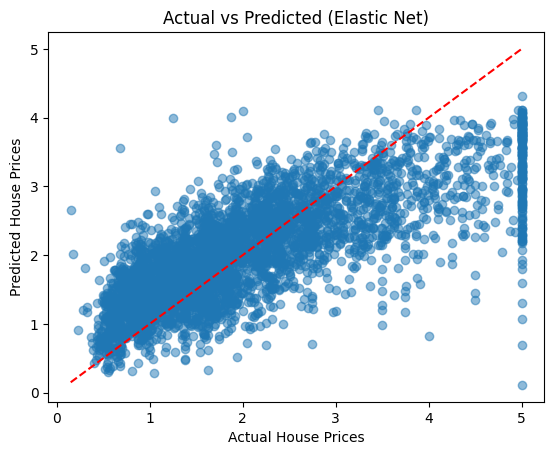

In [8]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted (Elastic Net)")
plt.show()
